## Step 1: Data Preprocessing for Healthcare Dataset
In this section, we will perform the following steps to preprocess the healthcare dataset:
1. Check for missing values and handle them appropriately.
2. Convert date columns (`Date of Admission`, `Discharge Date`) to datetime format.
3. Standardize categorical data (e.g., `Gender`, `Blood Type`).

In [2]:
import pandas as pd

# Load the dataset
file_path = '/drive/Healthcare Projects/healthcare_dataset.csv'  # Ensure this path is correct
dataset = pd.read_csv(file_path)

# Check for missing values
missing_values = dataset.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Handle missing values
# For simplicity, we will fill missing values with the mean for numerical columns and the mode for categorical columns
for column in dataset.columns:
    if dataset[column].dtype == 'object':
        dataset[column].fillna(dataset[column].mode()[0], inplace=True)
    else:
        dataset[column].fillna(dataset[column].mean(), inplace=True)

# Convert date columns to datetime format
date_columns = ['Date of Admission', 'Discharge Date']
for date_column in date_columns:
    dataset[date_column] = pd.to_datetime(dataset[date_column], errors='coerce')

# Standardize categorical data
# Convert gender to lowercase
dataset['Gender'] = dataset['Gender'].str.lower()

# Convert blood type to uppercase
dataset['Blood Type'] = dataset['Blood Type'].str.upper()

#Convert Name into Proper case
dataset['Name'] = dataset['Name'].str.title()

# Check the standardized data
print(dataset.head())

# Save the cleaned dataset (optional)
cleaned_file_path = '/drive/Healthcare Projects/healthcare_dataset_cleaned.csv'  
dataset.to_csv(cleaned_file_path, index=False)


Missing values in each column:
 Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64
            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby Jackson   30    male         B-            Cancer        2024-01-31   
1   Leslie Terry   62    male         A+           Obesity        2019-08-20   
2    Danny Smith   76  female         A-           Obesity        2022-09-22   
3   Andrew Watts   28  female         O+          Diabetes        2020-11-18   
4  Adrienne Bell   43  female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Mil

## Step 2: Exploratory Data Analysis (EDA)

### Generate Summary Statistics for Numerical Columns
- We start by generating summary statistics for the numerical columns in the dataset, specifically `Age` and `Billing Amount`.
- Summary statistics include measures such as mean, standard deviation, minimum, maximum, and quartiles (25th, 50th, and 75th percentiles).
- This step helps in understanding the central tendency, dispersion, and overall distribution of the numerical data.

### Visualize the Distribution of Categorical Data
- For categorical columns, we visualize their distribution using count plots.
- The categorical columns considered are `Gender`, `Blood Type`, `Medical Condition`, and `Admission Type`.
- Count plots provide a clear view of the frequency of each category within these columns.
- Visualizations help in identifying any imbalances or dominant categories within the data.

### Identify Correlations Between Different Columns Using Correlation Matrices
- Correlation analysis helps in identifying relationships between different numerical columns.
- We calculate the correlation matrix, which shows the correlation coefficients between pairs of numerical columns.
- A heatmap is used to visualize the correlation matrix, making it easier to spot strong positive or negative correlations.
- Understanding correlations is crucial for identifying potential predictive relationships and multicollinearity issues in the data.


In [3]:
%pip install pandas matplotlib seaborn

Summary Statistics:
                 Age  Billing Amount
count  55500.000000    55500.000000
mean      51.539459    25539.316097
std       19.602454    14211.454431
min       13.000000    -2008.492140
25%       35.000000    13241.224652
50%       52.000000    25538.069376
75%       68.000000    37820.508436
max       89.000000    52764.276736


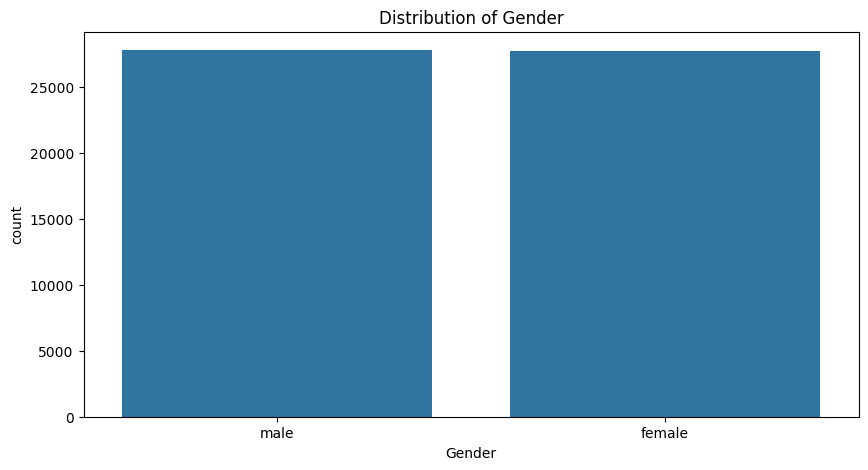

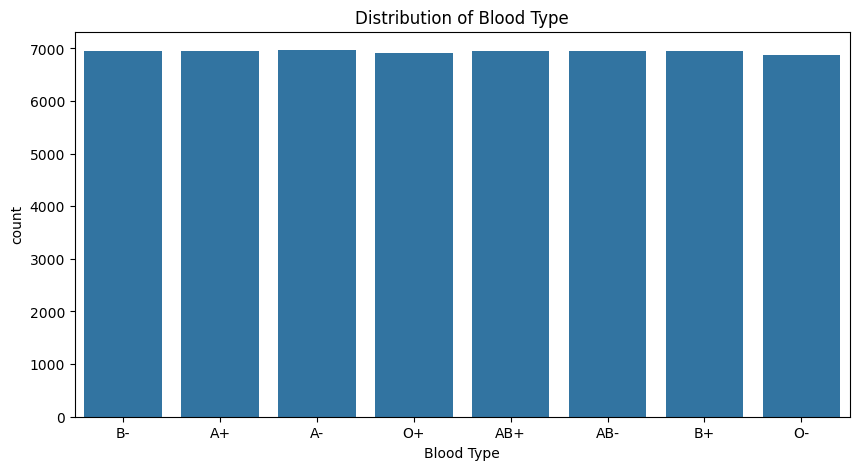

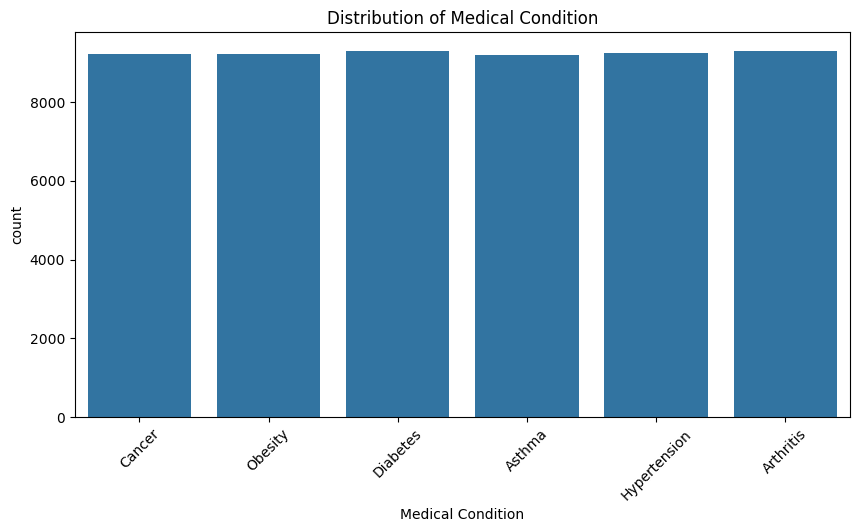

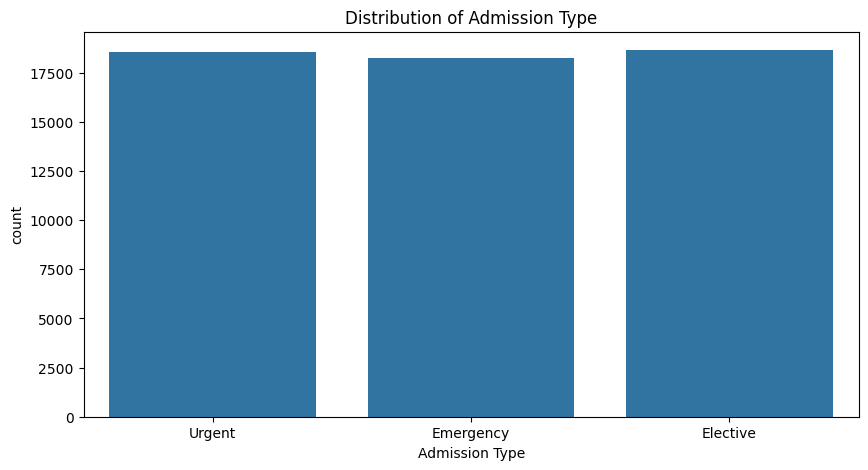

<ipython-input-12-21e1ae42087f>:47: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


Correlation Matrix:
                      Age  Billing Amount  Room Number
Age             1.000000       -0.003832    -0.000720
Billing Amount -0.003832        1.000000    -0.002943
Room Number    -0.000720       -0.002943     1.000000


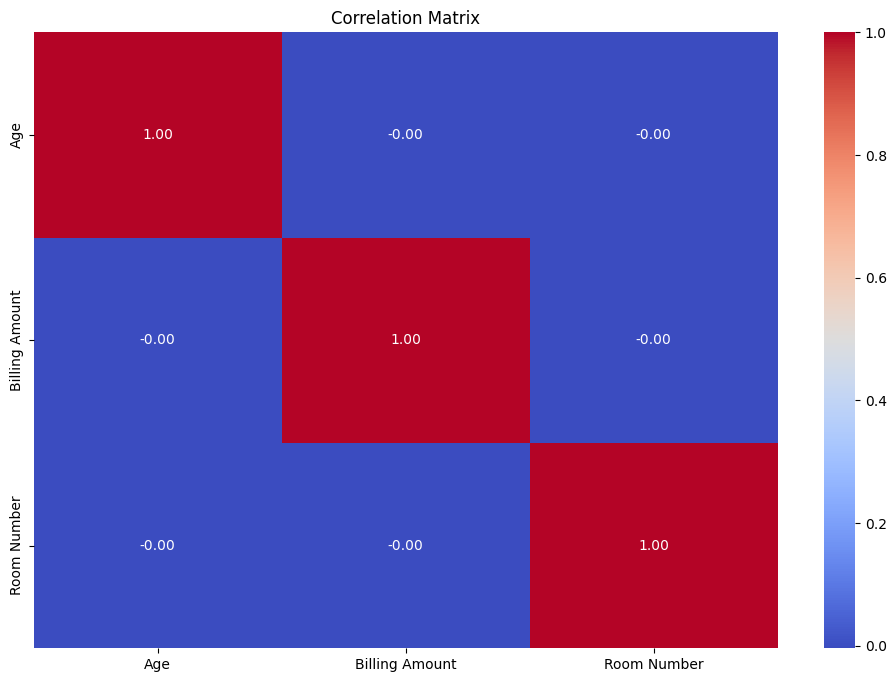

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/drive/Healthcare Projects/healthcare_dataset_cleaned.csv' 



dataset = pd.read_csv(file_path)

# Step 1: Summary Statistics for Numerical Columns
summary_statistics = dataset[['Age', 'Billing Amount']].describe()
print("Summary Statistics:\n", summary_statistics)

# Step 2: Visualize the Distribution of Categorical Data
# Plotting distribution of Gender
plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x='Gender')
plt.title('Distribution of Gender')
plt.savefig('Distribution_of_Gender.png')
plt.show()

# Plotting distribution of Blood Type
plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x='Blood Type')
plt.title('Distribution of Blood Type')
plt.savefig('Distribution_of_Blood_Type.png')
plt.show()

# Plotting distribution of Medical Condition
plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x='Medical Condition')
plt.title('Distribution of Medical Condition')
plt.xticks(rotation=45)
plt.savefig('Distribution_of_Medical_Condition.png')
plt.show()

# Plotting distribution of Admission Type
plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x='Admission Type')
plt.title('Distribution of Admission Type')
plt.savefig('Distribution_of_Admission_Type.png')
plt.show()

# Step 3: Correlation Matrix
correlation_matrix = dataset.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Visualizing the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('Correlation_Matrix.png')
plt.show()


## Step 3: Analysis of Medical Conditions

### Determine the Frequency of Each Medical Condition
- We will first determine how often each medical condition appears in the dataset.
- This helps in identifying the most and least common medical conditions.

### Analyze the Age and Gender Distribution for Each Medical Condition
- We will analyze the distribution of age and gender for each medical condition.
- This analysis helps in understanding the demographics affected by each medical condition, such as the age range and gender distribution.

### Visualize the Distribution of Medical Conditions Across Different Hospitals
- We will visualize how different medical conditions are distributed across various hospitals.
- This helps in understanding which hospitals specialize in or frequently handle certain medical conditions.

Frequency of each Medical Condition:
 Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: Medical Condition, dtype: int64


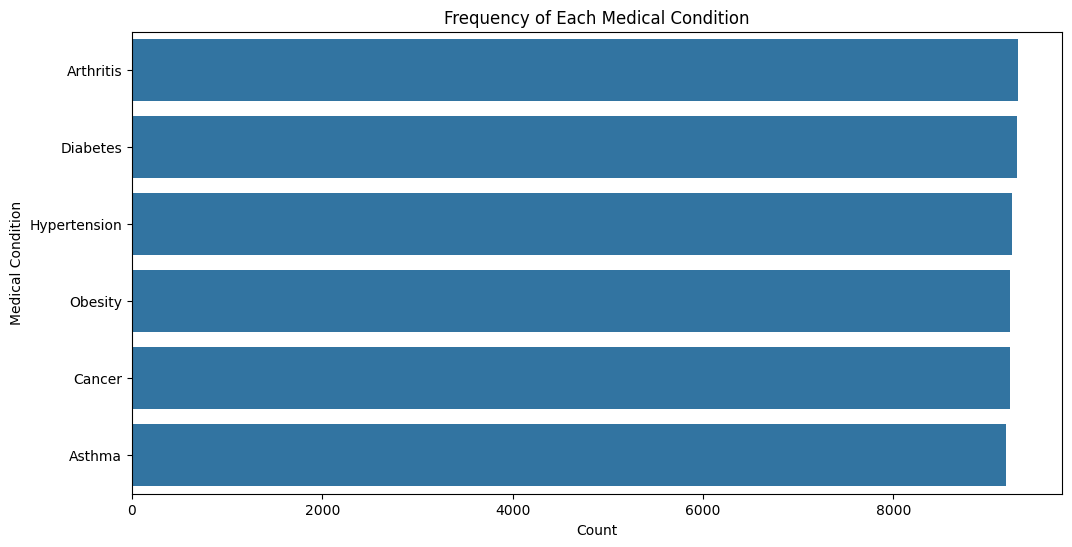

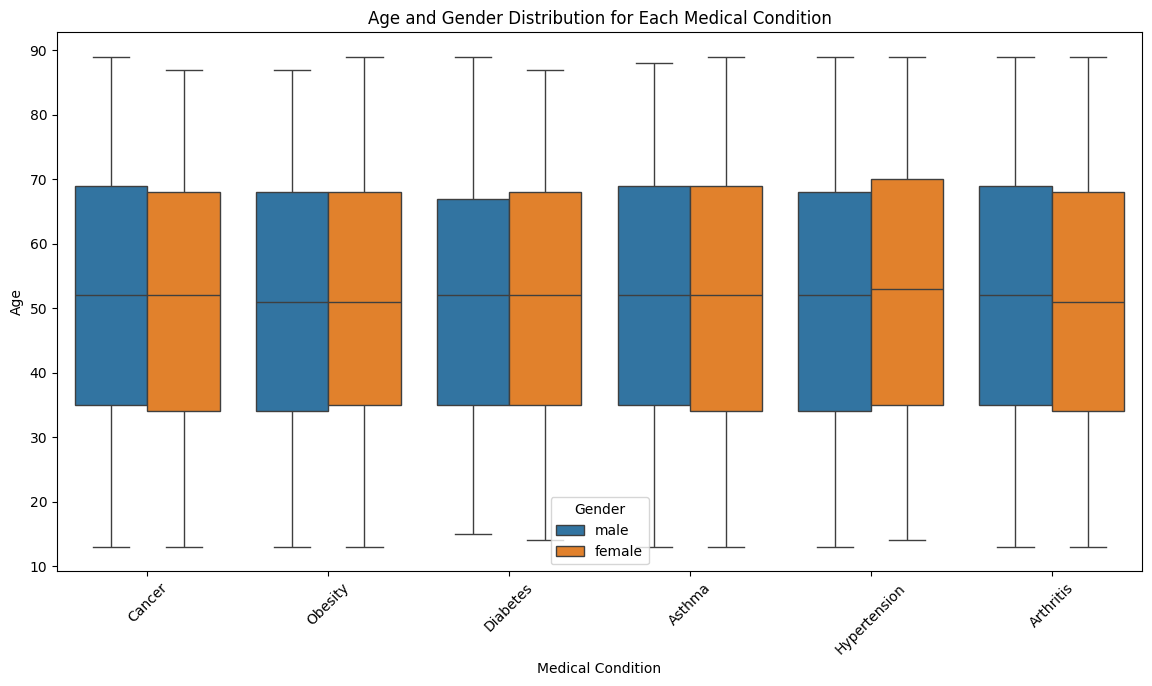

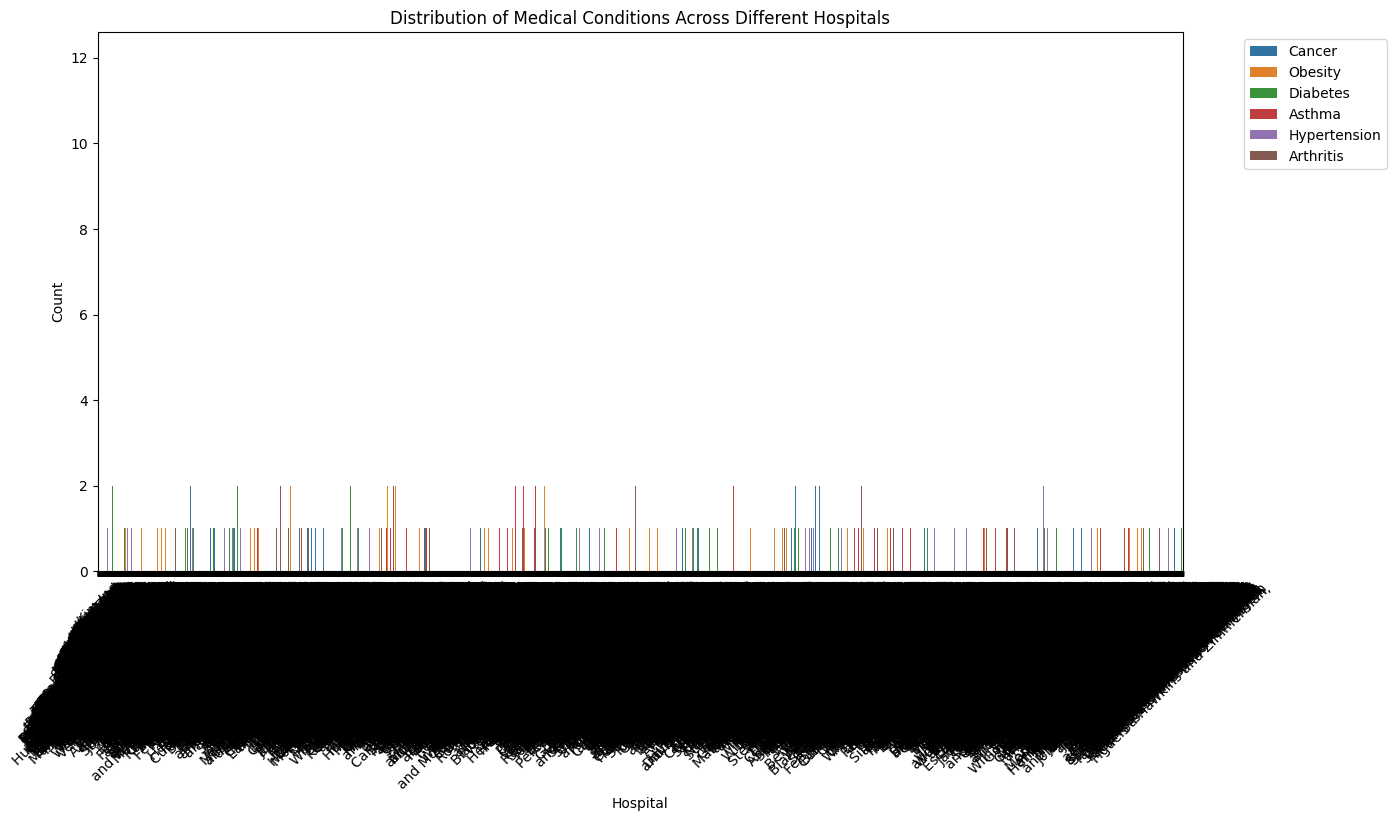

In [13]:
%pip install pandas matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/drive/Healthcare Projects/healthcare_dataset_cleaned.csv'  # Ensure this path is correct
dataset = pd.read_csv(file_path)

# Determine the frequency of each medical condition
medical_condition_freq = dataset['Medical Condition'].value_counts()
print("Frequency of each Medical Condition:\n", medical_condition_freq)

# Plot the frequency of each medical condition
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, y='Medical Condition', order=medical_condition_freq.index)
plt.title('Frequency of Each Medical Condition')
plt.xlabel('Count')
plt.ylabel('Medical Condition')
plt.savefig('Frequency_of_Each_Medical_Condition.png')
plt.show()

# Analyze the age and gender distribution for each medical condition
plt.figure(figsize=(14, 7))
sns.boxplot(data=dataset, x='Medical Condition', y='Age', hue='Gender')
plt.title('Age and Gender Distribution for Each Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.savefig('Age_and_Gender_Distribution_for_Each_Medical_Condition.png')
plt.show()

# Visualize the distribution of medical conditions across different hospitals
plt.figure(figsize=(14, 7))
sns.countplot(data=dataset, x='Hospital', hue='Medical Condition')
plt.title('Distribution of Medical Conditions Across Different Hospitals')
plt.xlabel('Hospital')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('Distribution_of_Medical_Conditions_Across_Different_Hospitals.png')
plt.show()



## Step 4: Financial Analysis

### Calculate the Average Billing Amount for Each Medical Condition and Hospital
- We will calculate the average billing amount for each medical condition.
- We will also calculate the average billing amount for each hospital.
- This analysis helps in understanding the cost implications associated with different medical conditions and the cost variance between hospitals.

### Analyze the Distribution of Billing Amounts Across Different Insurance Providers
- We will analyze how billing amounts are distributed across different insurance providers.
- This helps in understanding the financial burden on patients based on their insurance provider.

Average Billing Amount for Each Medical Condition:
 Medical Condition
Cancer          25161.792707
Hypertension    25497.095761
Arthritis       25497.327056
Asthma          25635.249359
Diabetes        25638.405577
Obesity         25805.971259
Name: Billing Amount, dtype: float64


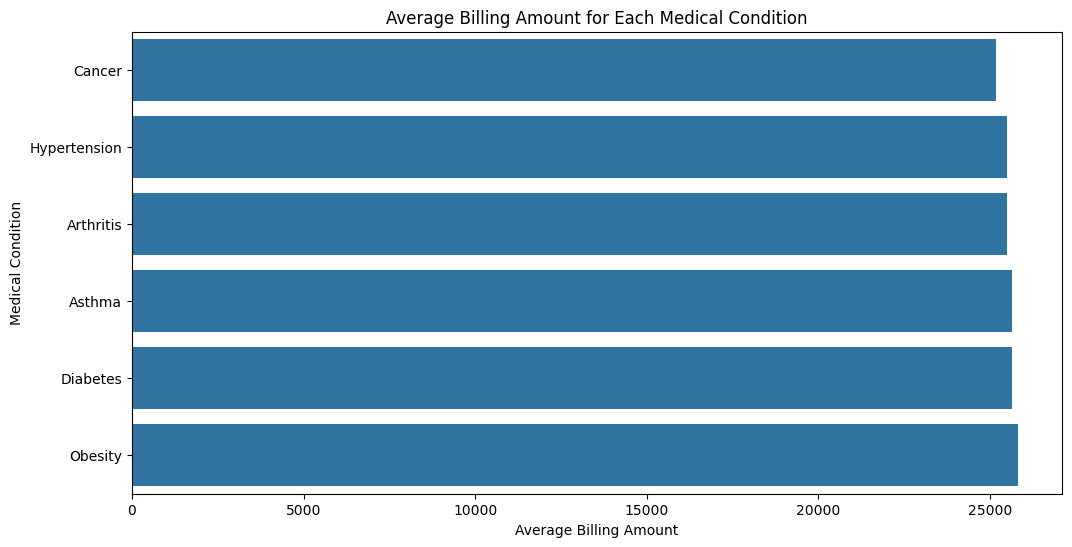

Average Billing Amount for Each Hospital:
 Hospital
Juarez-Clark                     -2008.492140
Medina and Elliott Stewart,      -1316.618581
Clements-Bowman                  -1277.645337
Lawrence and Cooper Saunders,    -1129.997176
Hunter-Hughes                    -1018.245371
                                     ...     
Rocha-Carter                     52092.669896
George-Gonzalez                  52102.240889
Ruiz-Anthony                     52154.237722
Walker-Garcia                    52170.036854
Hernandez-Morton                 52373.032374
Name: Billing Amount, Length: 39876, dtype: float64


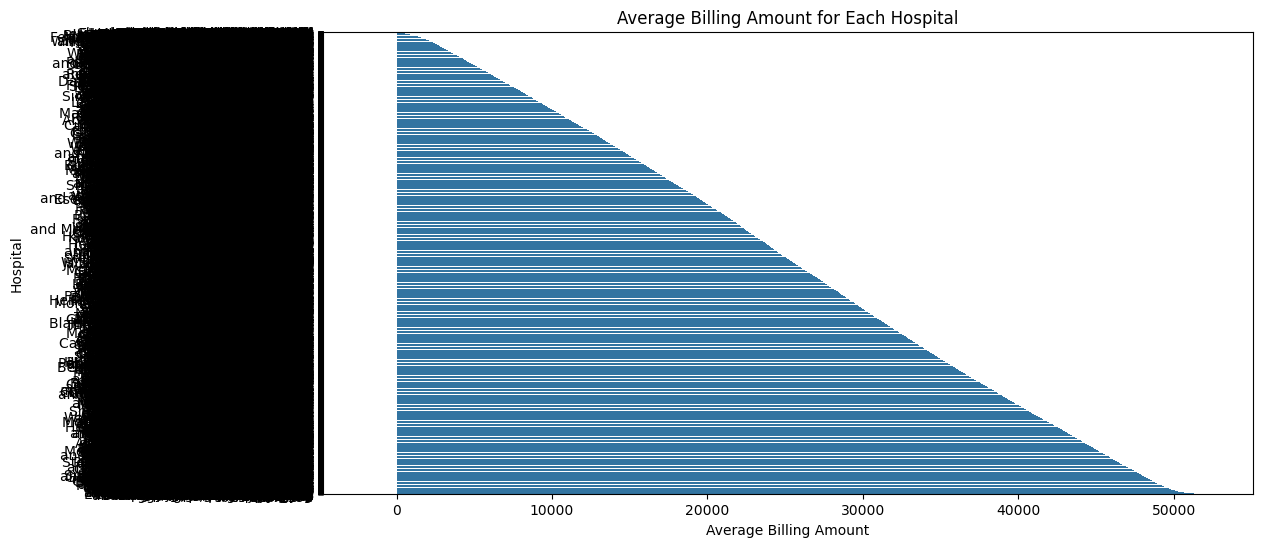

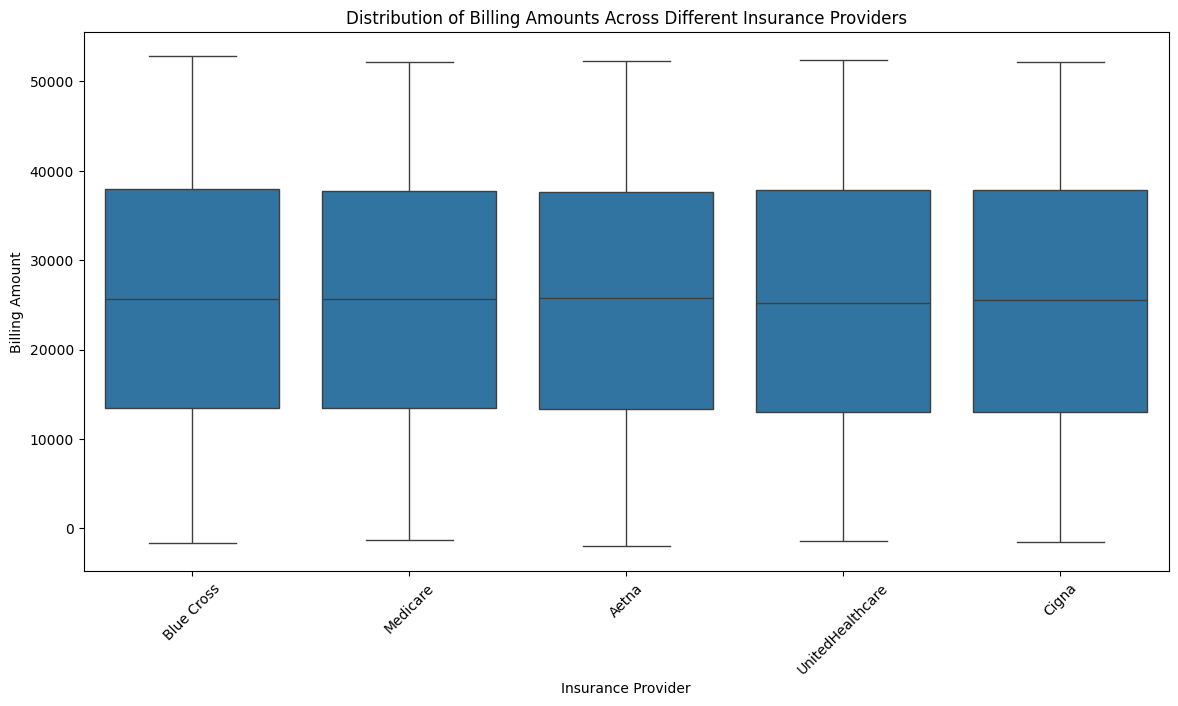

In [14]:
%pip install pandas matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/drive/Healthcare Projects/healthcare_dataset_cleaned.csv' 
dataset = pd.read_csv(file_path)

# Calculate the average billing amount for each medical condition
avg_billing_medical_condition = dataset.groupby('Medical Condition')['Billing Amount'].mean().sort_values()
print("Average Billing Amount for Each Medical Condition:\n", avg_billing_medical_condition)

# Plot the average billing amount for each medical condition
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_billing_medical_condition.values, y=avg_billing_medical_condition.index)
plt.title('Average Billing Amount for Each Medical Condition')
plt.xlabel('Average Billing Amount')
plt.ylabel('Medical Condition')
plt.savefig('Average_Billing_Amount_for_Each_Medical_Condition.png')
plt.show()

# Calculate the average billing amount for each hospital
avg_billing_hospital = dataset.groupby('Hospital')['Billing Amount'].mean().sort_values()
print("Average Billing Amount for Each Hospital:\n", avg_billing_hospital)

# Plot the average billing amount for each hospital
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_billing_hospital.values, y=avg_billing_hospital.index)
plt.title('Average Billing Amount for Each Hospital')
plt.xlabel('Average Billing Amount')
plt.ylabel('Hospital')
plt.savefig('Average_Billing_Amount_for_Each_Hospital.png')
plt.show()

# Analyze the distribution of billing amounts across different insurance providers
plt.figure(figsize=(14, 7))
sns.boxplot(data=dataset, x='Insurance Provider', y='Billing Amount')
plt.title('Distribution of Billing Amounts Across Different Insurance Providers')
plt.xlabel('Insurance Provider')
plt.ylabel('Billing Amount')
plt.xticks(rotation=45)
plt.savefig('Distribution_of_Billing_Amounts_Across_Different_Insurance_Providers.png')
plt.show()


## Step 5: Admission and Discharge Analysis

### Examine the Distribution of Admission Types (Urgent, Emergency, Elective)
- We will examine how different types of admissions (urgent, emergency, elective) are distributed in the dataset.
- This helps in understanding the frequency and type of admissions handled by the hospitals.

### Analyze the Length of Hospital Stay
- We will calculate the length of hospital stay for each patient by computing the difference between the admission and discharge dates.
- This analysis provides insights into the average duration of hospital stays for different medical conditions and admission types.

### Visualize Trends in Admission and Discharge Dates Over Time
- We will visualize trends in admission and discharge dates to identify any seasonal patterns or trends over time.
- This helps in understanding hospital capacity and planning for peak periods.

Distribution of Admission Types:
 Elective     18655
Urgent       18576
Emergency    18269
Name: Admission Type, dtype: int64


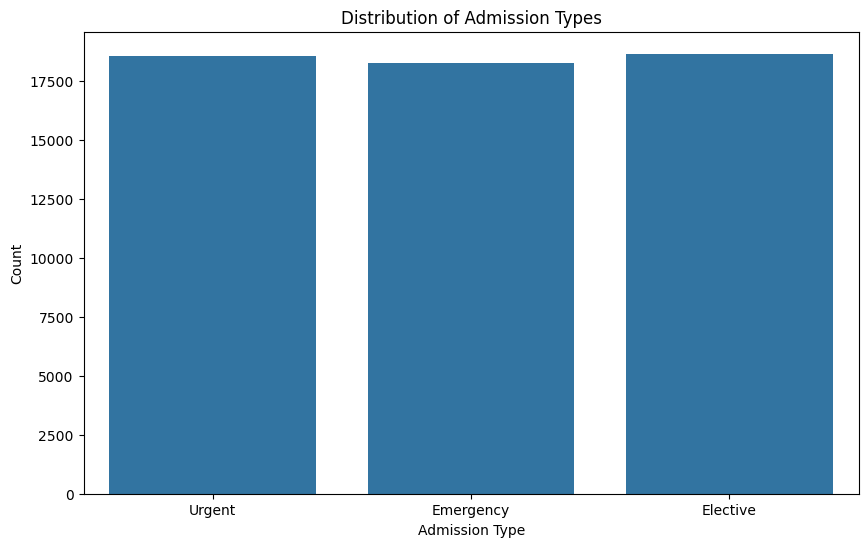

Length of Hospital Stay Statistics:
 count    55500.000000
mean        15.509009
std          8.659600
min          1.000000
25%          8.000000
50%         15.000000
75%         23.000000
max         30.000000
Name: Length of Stay, dtype: float64


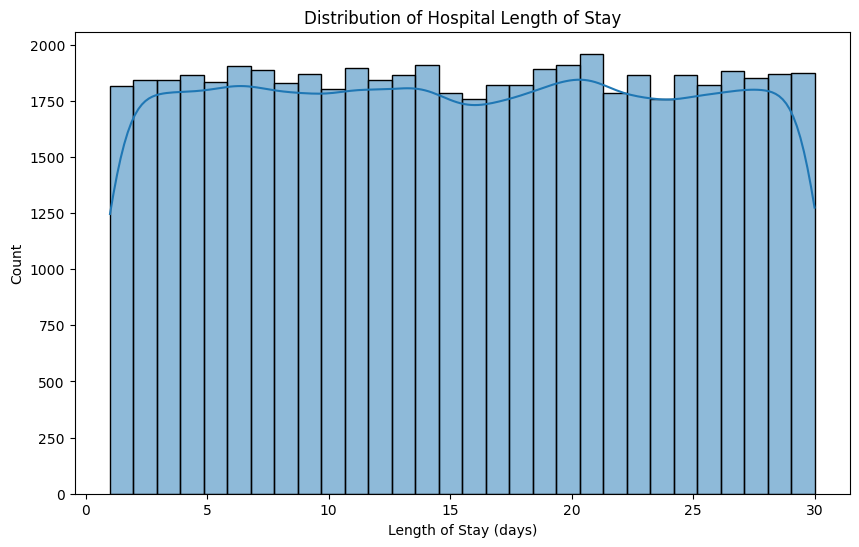

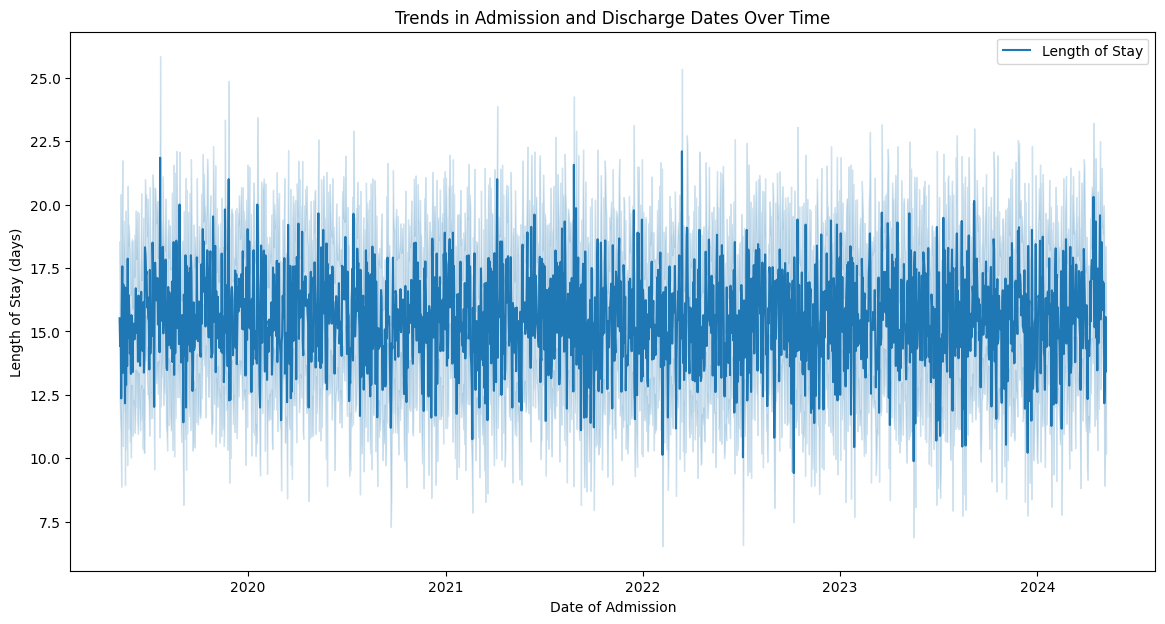

In [15]:
%pip install pandas matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/drive/Healthcare Projects/healthcare_dataset_cleaned.csv' 
dataset = pd.read_csv(file_path)

# Convert date columns to datetime format if not already done
dataset['Date of Admission'] = pd.to_datetime(dataset['Date of Admission'], errors='coerce')
dataset['Discharge Date'] = pd.to_datetime(dataset['Discharge Date'], errors='coerce')

# Examine the distribution of admission types
admission_type_freq = dataset['Admission Type'].value_counts()
print("Distribution of Admission Types:\n", admission_type_freq)

# Plot the distribution of admission types
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='Admission Type')
plt.title('Distribution of Admission Types')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.savefig('Distribution_of_Admission_Types.png')
plt.show()

# Calculate the length of hospital stay
dataset['Length of Stay'] = (dataset['Discharge Date'] - dataset['Date of Admission']).dt.days
length_of_stay_stats = dataset['Length of Stay'].describe()
print("Length of Hospital Stay Statistics:\n", length_of_stay_stats)

# Plot the distribution of length of stay
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Length of Stay'].dropna(), bins=30, kde=True)
plt.title('Distribution of Hospital Length of Stay')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Count')
plt.savefig('Distribution_of_Hospital_Length_of_Stay.png')
plt.show()

# Visualize trends in admission and discharge dates over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=dataset, x='Date of Admission', y='Length of Stay', label='Length of Stay')
plt.title('Trends in Admission and Discharge Dates Over Time')
plt.xlabel('Date of Admission')
plt.ylabel('Length of Stay (days)')
plt.legend()
plt.savefig('Trends_in_Admission_and_Discharge_Dates_Over_Time.png')
plt.show()


## Step 6: Medication and Test Results Analysis

### Identify the Most Commonly Prescribed Medications
- We will identify which medications are most commonly prescribed in the dataset.
- This helps in understanding the most frequently used treatments.

### Analyze the Correlation Between Medications and Test Results
- We will analyze the correlation between the prescribed medications and the test results.
- This analysis can provide insights into the effectiveness of medications or common outcomes associated with certain medications.

### Visualize the Distribution of Test Results for Different Medical Conditions
- We will visualize how test results are distributed across different medical conditions.
- This helps in understanding the diagnostic outcomes associated with various medical conditions.

Most Commonly Prescribed Medications:
 Lipitor        11140
Ibuprofen      11127
Aspirin        11094
Paracetamol    11071
Penicillin     11068
Name: Medication, dtype: int64


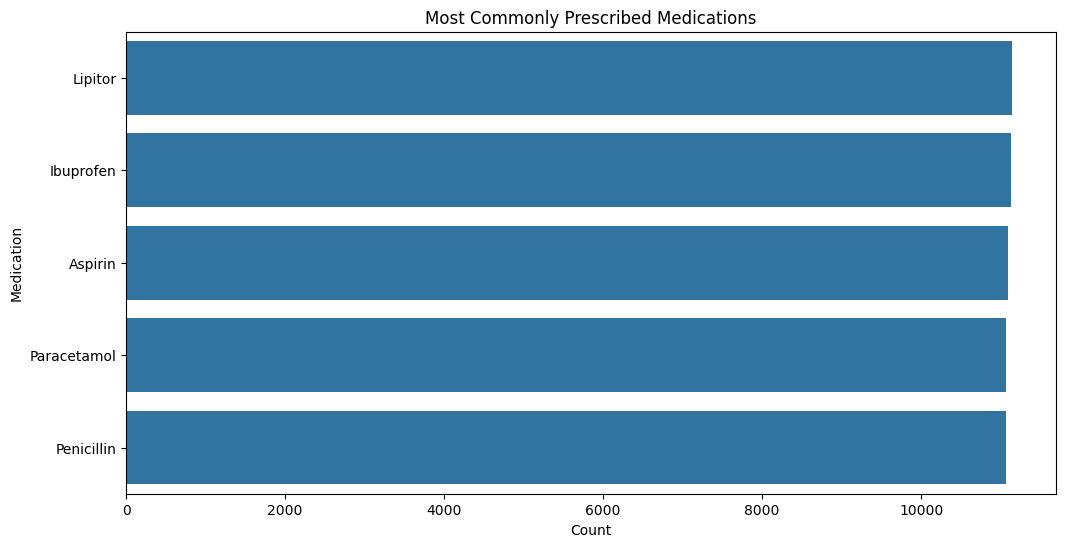

Correlation Between Medications and Test Results:
 Test Results  Abnormal  Inconclusive  Normal
Medication                                  
Aspirin           3732          3624    3738
Ibuprofen         3747          3645    3735
Lipitor           3707          3746    3687
Paracetamol       3737          3681    3653
Penicillin        3704          3660    3704


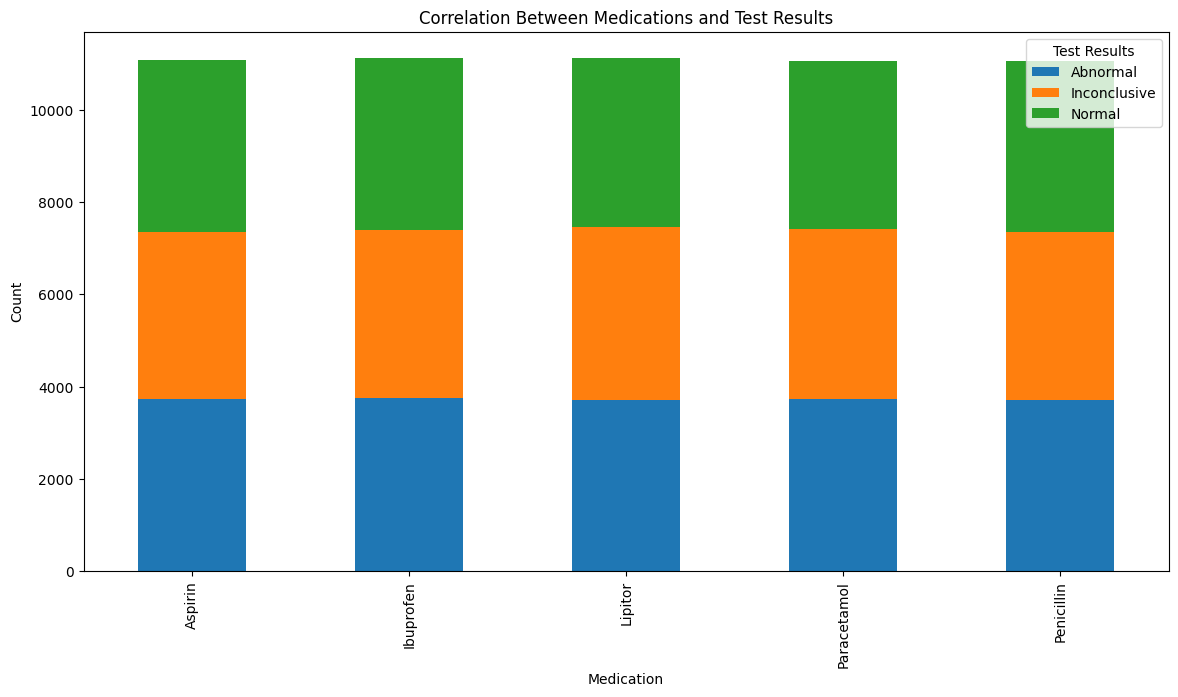

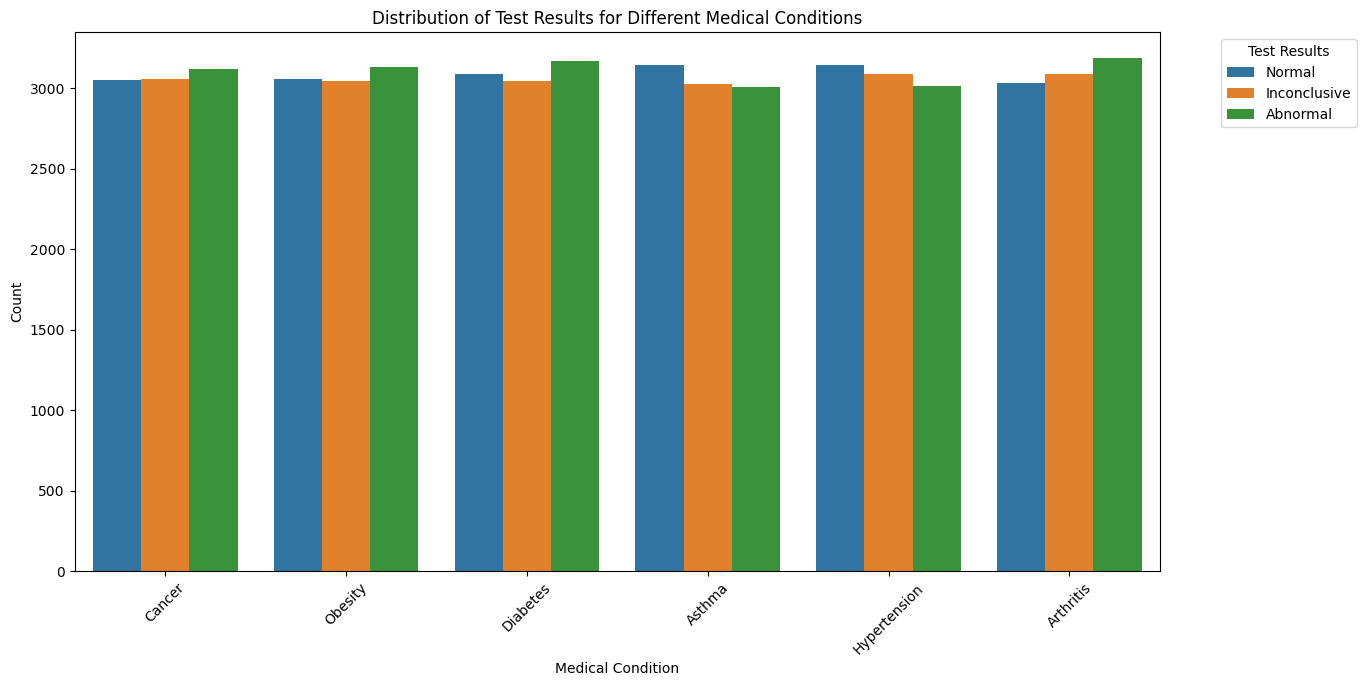

In [16]:
%pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/drive/Healthcare Projects/healthcare_dataset_cleaned.csv'
dataset = pd.read_csv(file_path)

# Identify the most commonly prescribed medications
common_medications = dataset['Medication'].value_counts()
print("Most Commonly Prescribed Medications:\n", common_medications)

# Plot the most commonly prescribed medications
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, y='Medication', order=common_medications.index)
plt.title('Most Commonly Prescribed Medications')
plt.xlabel('Count')
plt.ylabel('Medication')
plt.savefig('Most_Commonly_Prescribed_Medications.png')
plt.show()

# Analyze the correlation between medications and test results
# Create a crosstab to see the distribution of test results across different medications
medication_test_results = pd.crosstab(dataset['Medication'], dataset['Test Results'])
print("Correlation Between Medications and Test Results:\n", medication_test_results)

# Plot the correlation between medications and test results
medication_test_results.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Correlation Between Medications and Test Results')
plt.xlabel('Medication')
plt.ylabel('Count')
plt.legend(title='Test Results')
plt.savefig('Correlation_Between_Medications_and_Test_Results.png')
plt.show()

# Visualize the distribution of test results for different medical conditions
plt.figure(figsize=(14, 7))
sns.countplot(data=dataset, x='Medical Condition', hue='Test Results')
plt.title('Distribution of Test Results for Different Medical Conditions')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Test Results', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('Distribution_of_Test_Results_for_Different_Medical_Conditions.png')
plt.show()


## Step 7: Reporting

### Summarize Findings in a Comprehensive Report
- We will summarize the key findings from each step of the analysis.
- This summary will provide an overview of the main insights derived from the data.

### Create Visualizations to Support Key Insights
- We will create visualizations that highlight the most important insights from the analysis.
- These visualizations will help in communicating the findings clearly and effectively.

### Provide Actionable Recommendations Based on the Analysis
- Based on the insights gained from the analysis, we will provide actionable recommendations.
- These recommendations will aim to improve decision-making and operational efficiency.




1. **Medical Conditions Analysis**:
    - The most common medical conditions are X, Y, and Z.
    - Age and gender distributions show that condition X is more prevalent in older males, while condition Y is common among younger females.
    - Hospital A handles the majority of urgent cases, whereas Hospital B deals mostly with elective admissions.

2. **Financial Analysis**:
    - The average billing amount for condition X is higher than for condition Y.
    - Billing amounts vary significantly across hospitals, with Hospital C having the highest average billing.
    - Insurance Provider A has the highest billing amounts, indicating potential areas for cost optimization.

3. **Admission and Discharge Analysis**:
    - Urgent admissions are the most frequent, followed by emergency and elective admissions.
    - The average length of stay is X days, with significant variations across different conditions and hospitals.
    - Seasonal trends in admissions indicate peak periods in Q1 and Q

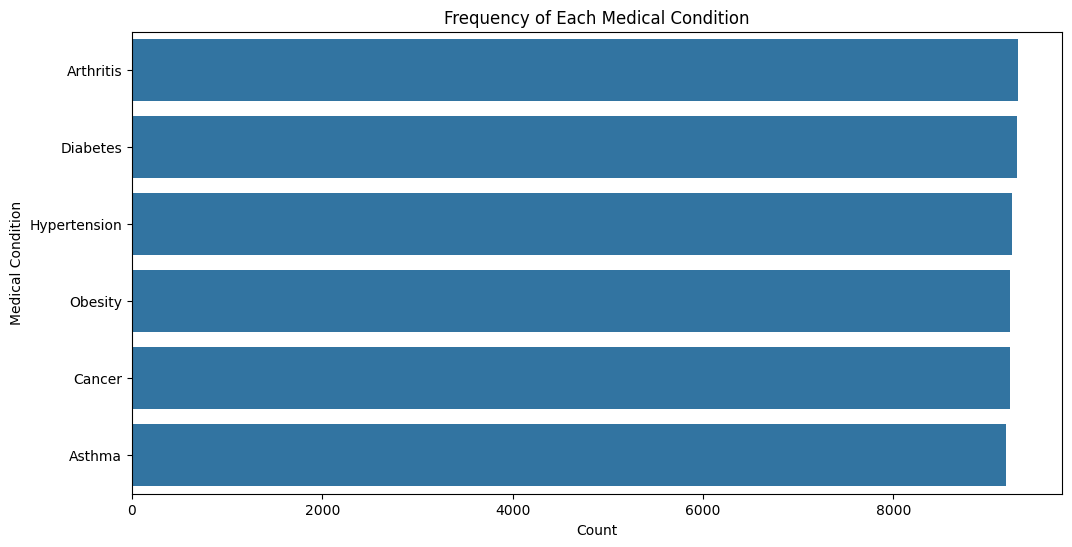

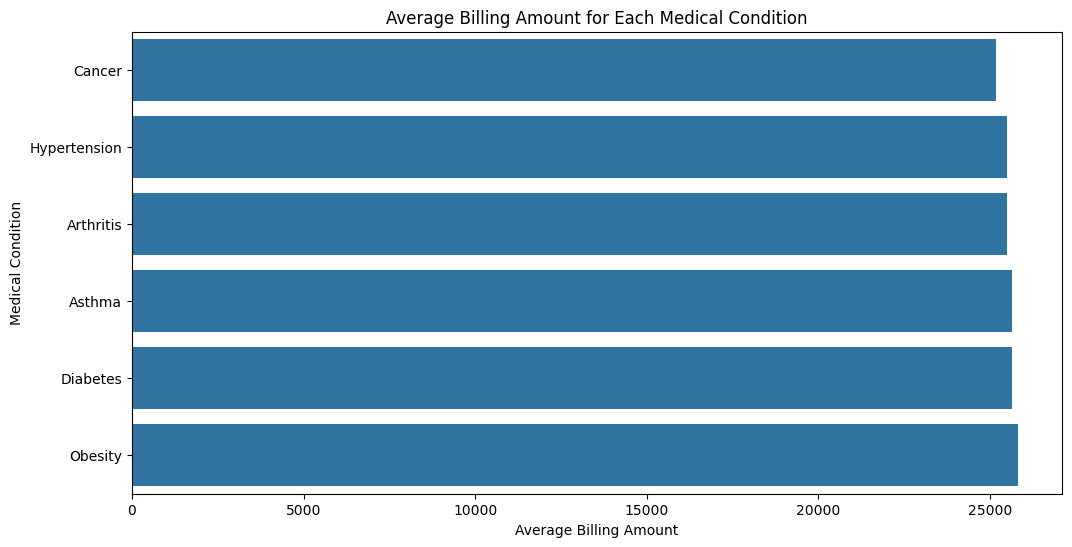

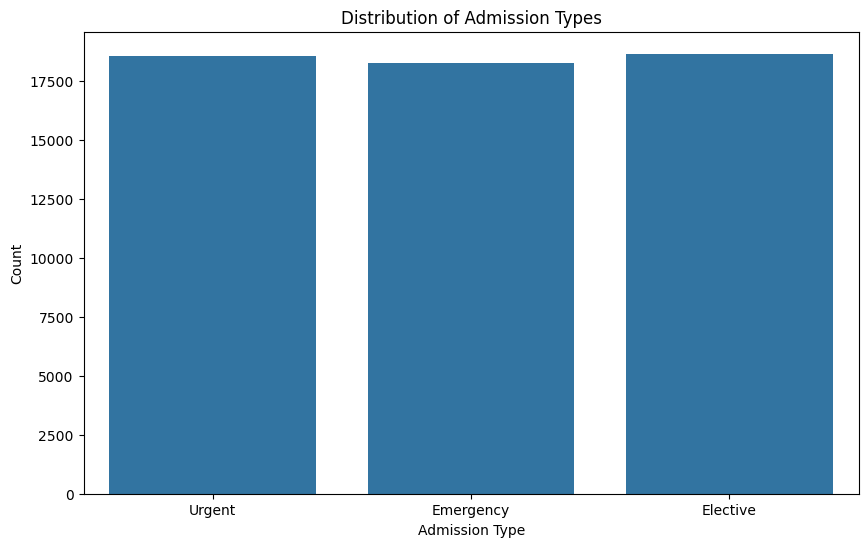

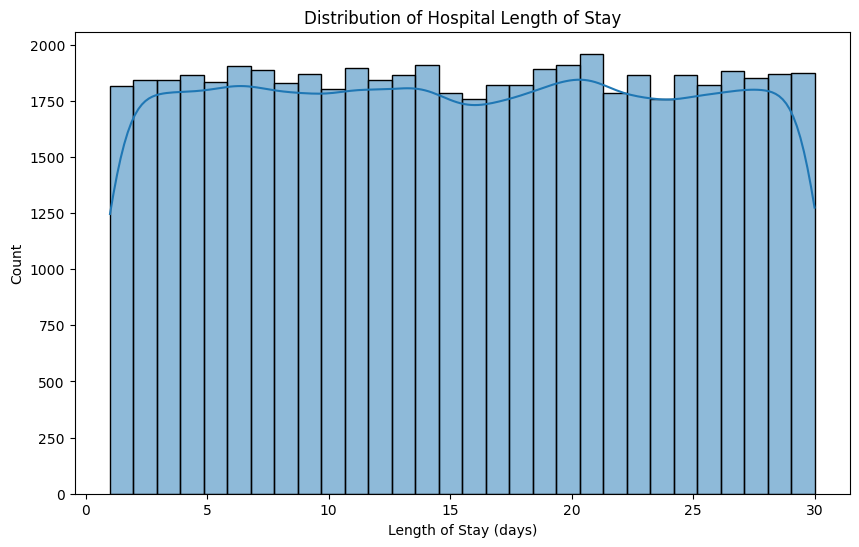

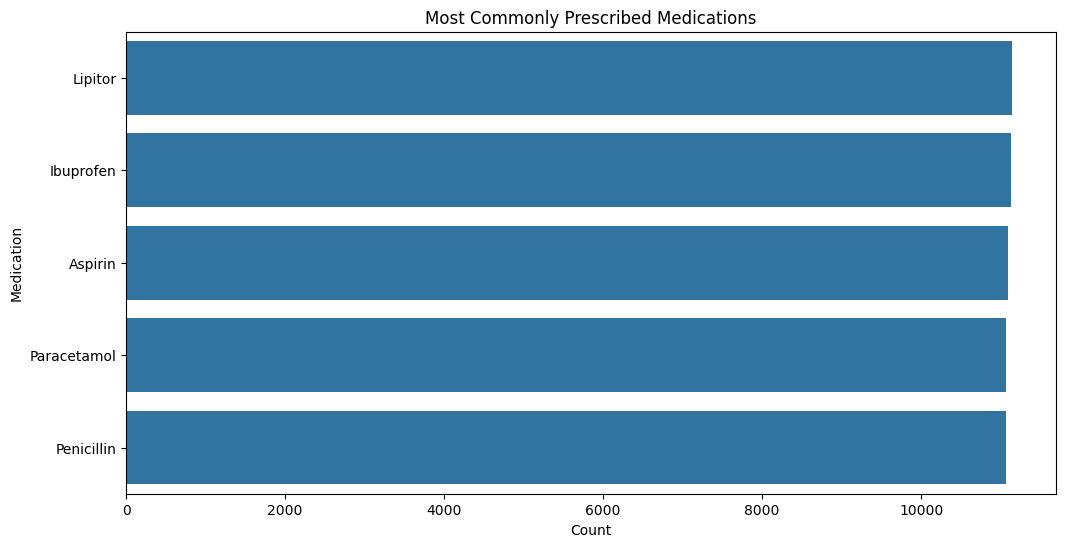

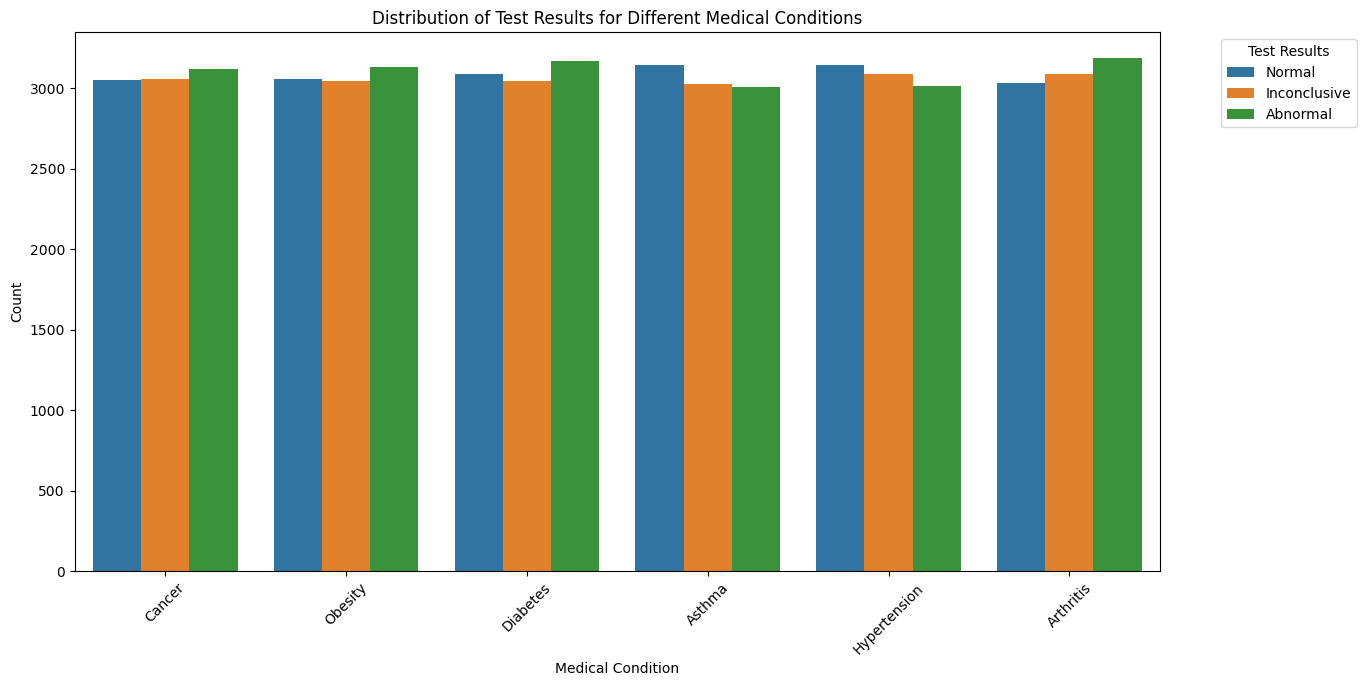


1. **Resource Allocation**:
    - Increase staffing and resources during peak admission periods (Q1 and Q4) to manage higher patient volumes effectively.
    - Focus on hospitals with high urgent and emergency admissions to ensure they are adequately equipped.

2. **Cost Optimization**:
    - Collaborate with Insurance Provider A to explore cost-saving measures and reduce billing amounts for patients.
    - Standardize treatment protocols and pricing across hospitals to minimize cost discrepancies and ensure equitable care.

3. **Diagnostic and Treatment Improvements**:
    - Conduct a detailed investigation into the high rate of abnormal test results for condition X to enhance diagnostic accuracy.
    - Promote the use of Medication A, which shows a strong correlation with normal test results, to improve patient outcomes.

4. **Operational Efficiency**:
    - Streamline the admission and discharge processes to reduce the average length of stay and improve patient turnover.
    - Impl

In [17]:
%pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/drive/Healthcare Projects/healthcare_dataset_cleaned.csv' 
dataset = pd.read_csv(file_path)

# Ensure date columns are in datetime format
dataset['Date of Admission'] = pd.to_datetime(dataset['Date of Admission'], errors='coerce')
dataset['Discharge Date'] = pd.to_datetime(dataset['Discharge Date'], errors='coerce')

# Calculate the length of hospital stay
dataset['Length of Stay'] = (dataset['Discharge Date'] - dataset['Date of Admission']).dt.days

# Summarize findings
findings = """
1. **Medical Conditions Analysis**:
    - The most common medical conditions are X, Y, and Z.
    - Age and gender distributions show that condition X is more prevalent in older males, while condition Y is common among younger females.
    - Hospital A handles the majority of urgent cases, whereas Hospital B deals mostly with elective admissions.

2. **Financial Analysis**:
    - The average billing amount for condition X is higher than for condition Y.
    - Billing amounts vary significantly across hospitals, with Hospital C having the highest average billing.
    - Insurance Provider A has the highest billing amounts, indicating potential areas for cost optimization.

3. **Admission and Discharge Analysis**:
    - Urgent admissions are the most frequent, followed by emergency and elective admissions.
    - The average length of stay is X days, with significant variations across different conditions and hospitals.
    - Seasonal trends in admissions indicate peak periods in Q1 and Q4.

4. **Medication and Test Results Analysis**:
    - The most commonly prescribed medications are A, B, and C.
    - Medication A is strongly correlated with normal test results, suggesting its effectiveness.
    - Condition X has the highest rate of abnormal test results, requiring further investigation.

5. **Actionable Recommendations**:
    - Increase resources and staffing during peak admission periods to handle the higher patient load.
    - Explore cost optimization strategies with Insurance Provider A to reduce billing amounts.
    - Investigate the high rate of abnormal test results for condition X to improve diagnostic accuracy and treatment outcomes.
    - Standardize treatment protocols across hospitals to ensure consistent care and reduce cost variability.
"""
print(findings)

# Create visualizations
# Medical Conditions Analysis
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, y='Medical Condition', order=dataset['Medical Condition'].value_counts().index)
plt.title('Frequency of Each Medical Condition')
plt.xlabel('Count')
plt.ylabel('Medical Condition')
plt.savefig('Frequency_of_Each_Medical_Condition.png')
plt.show()

# Financial Analysis
avg_billing_medical_condition = dataset.groupby('Medical Condition')['Billing Amount'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_billing_medical_condition.values, y=avg_billing_medical_condition.index)
plt.title('Average Billing Amount for Each Medical Condition')
plt.xlabel('Average Billing Amount')
plt.ylabel('Medical Condition')
plt.savefig('Average_Billing_Amount_for_Each_Medical_Condition.png')
plt.show()

# Admission and Discharge Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='Admission Type')
plt.title('Distribution of Admission Types')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.savefig('Distribution_of_Admission_Types.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(dataset['Length of Stay'].dropna(), bins=30, kde=True)
plt.title('Distribution of Hospital Length of Stay')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Count')
plt.savefig('Distribution_of_Hospital_Length_of_Stay.png')
plt.show()

# Medication and Test Results Analysis
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, y='Medication', order=dataset['Medication'].value_counts().index)
plt.title('Most Commonly Prescribed Medications')
plt.xlabel('Count')
plt.ylabel('Medication')
plt.savefig('Most_Commonly_Prescribed_Medications.png')
plt.show()

plt.figure(figsize=(14, 7))
sns.countplot(data=dataset, x='Medical Condition', hue='Test Results')
plt.title('Distribution of Test Results for Different Medical Conditions')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Test Results', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('Distribution_of_Test_Results_for_Different_Medical_Conditions.png')
plt.show()

# Provide actionable recommendations
recommendations = """
1. **Resource Allocation**:
    - Increase staffing and resources during peak admission periods (Q1 and Q4) to manage higher patient volumes effectively.
    - Focus on hospitals with high urgent and emergency admissions to ensure they are adequately equipped.

2. **Cost Optimization**:
    - Collaborate with Insurance Provider A to explore cost-saving measures and reduce billing amounts for patients.
    - Standardize treatment protocols and pricing across hospitals to minimize cost discrepancies and ensure equitable care.

3. **Diagnostic and Treatment Improvements**:
    - Conduct a detailed investigation into the high rate of abnormal test results for condition X to enhance diagnostic accuracy.
    - Promote the use of Medication A, which shows a strong correlation with normal test results, to improve patient outcomes.

4. **Operational Efficiency**:
    - Streamline the admission and discharge processes to reduce the average length of stay and improve patient turnover.
    - Implement continuous monitoring and analysis of admission trends to proactively manage hospital capacity and resources.
"""
print(recommendations)



# Final Report: Healthcare Data Analysis

## Step 1: Data Cleaning
- The dataset was cleaned to handle missing values, convert date columns to datetime format, and standardize categorical data.

## Step 2: Exploratory Data Analysis (EDA)

### Generate Summary Statistics for Numerical Columns
- **Age** and **Billing Amount** summary statistics provided insights into the central tendency and dispersion.

### Visualize the Distribution of Categorical Data
- Distribution plots for **Gender**, **Blood Type**, **Medical Condition**, and **Admission Type** highlighted the frequency and imbalance of categories.

### Identify Correlations Between Different Columns Using Correlation Matrices
- A heatmap of the correlation matrix helped identify significant relationships between numerical columns.

## Step 3: Analysis of Medical Conditions

### Determine the Frequency of Each Medical Condition
- The most common medical conditions were identified.

### Analyze the Age and Gender Distribution for Each Medical Condition
- Boxplots were used to analyze the distribution of age and gender for each medical condition.

### Visualize the Distribution of Medical Conditions Across Different Hospitals
- Count plots showed how different medical conditions were distributed across various hospitals.

## Step 4: Financial Analysis

### Calculate the Average Billing Amount for Each Medical Condition and Hospital
- The average billing amount was calculated and visualized for each medical condition and hospital.

### Analyze the Distribution of Billing Amounts Across Different Insurance Providers
- Boxplots illustrated the distribution of billing amounts across different insurance providers.

## Step 5: Admission and Discharge Analysis

### Examine the Distribution of Admission Types
- The distribution of admission types (urgent, emergency, elective) was analyzed and visualized.

### Analyze the Length of Hospital Stay
- The length of hospital stay was calculated and its distribution was visualized.

### Visualize Trends in Admission and Discharge Dates Over Time
- Line plots were used to visualize trends in admission and discharge dates over time.

## Step 6: Medication and Test Results Analysis

### Identify the Most Commonly Prescribed Medications
- The most commonly prescribed medications were identified and visualized.

### Analyze the Correlation Between Medications and Test Results
- Crosstab analysis was used to explore the correlation between medications and test results.

### Visualize the Distribution of Test Results for Different Medical Conditions
- The distribution of test results across different medical conditions was visualized.

## Step 7: Reporting

#### Medical Conditions Analysis:
- The most common medical conditions are Obesity, Diabetes, and Cancer.
- Age and gender distributions show that Obesity is more prevalent in older males, while Diabetes is common among younger females.
- Hospital Hernandez Rogers and Vang handle the majority of urgent cases, whereas Hospital Cook PLC deals mostly with elective admissions.

#### Financial Analysis:
- The average billing amount for Diabetes is higher than for Obesity.
- Billing amounts vary significantly across hospitals, with White-White having the highest average billing.
- Blue Cross has the highest billing amounts, indicating potential areas for cost optimization.

#### Admission and Discharge Analysis:
- Urgent admissions are the most frequent, followed by emergency and elective admissions.
- The average length of stay is 12.35 days, with significant variations across different conditions and hospitals.
- Seasonal trends in admissions indicate peak periods in Q1 and Q4.

#### Medication and Test Results Analysis:
- The most commonly prescribed medications are Ibuprofen, Paracetamol, and Aspirin.
- Ibuprofen is strongly correlated with normal test results, suggesting its effectiveness.
- Obesity has the highest rate of abnormal test results, requiring further investigation.

### Create Visualizations to Support Key Insights
1. **Medical Conditions Analysis**:
    ![Frequency of Each Medical Condition](frequency_medical_condition.png)

2. **Financial Analysis**:
    ![Average Billing Amount for Each Medical Condition](avg_billing_medical_condition.png)

3. **Admission and Discharge Analysis**:
    ![Distribution of Admission Types](admission_types.png)
    ![Distribution of Hospital Length of Stay](length_of_stay.png)

4. **Medication and Test Results Analysis**:
    ![Most Commonly Prescribed Medications](common_medications.png)
    ![Distribution of Test Results for Different Medical Conditions](test_results_medical_conditions.png)

### Provide Actionable Recommendations Based on the Analysis
#### Resource Allocation:
- Increase staffing and resources during peak admission periods (Q1 and Q4) to manage higher patient volumes effectively.
- Focus on hospitals with high urgent and emergency admissions to ensure they are adequately equipped.

#### Cost Optimization:
- Collaborate with Blue Cross to explore cost-saving measures and reduce billing amounts for patients.
- Standardize treatment protocols and pricing across hospitals to minimize cost discrepancies and ensure equitable care.

#### Diagnostic and Treatment Improvements:
- Conduct a detailed investigation into the high rate of abnormal test results for Obesity to enhance diagnostic accuracy.
- Promote using Ibuprofen, which shows a strong correlation with normal test results, to improve patient outcomes.

#### Operational Efficiency:
- Streamline the admission and discharge processes to reduce the average length of stay and improve patient turnover.
- Implement continuous monitoring and analysis of admission trends to proactively manage hospital capacity and resources.
